<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240416_Autoencoders_for_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Masterclass - Autoencoders for image compression

인코딩 후 디코딩을 하는 알고리즘이야.

단순 이미지의 경우 선형오토인코더로 가능하고

큰 이미지의 경우 cnn을 변형해서 encoding, decoding하는 방식을 쓸 수 있어.

## Linear autoencoder

### Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input # 신경막 입력층, Dense는 전연결층
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Visualizing the images

In [ ]:
np.random.randint(0, 59999)

56049

1


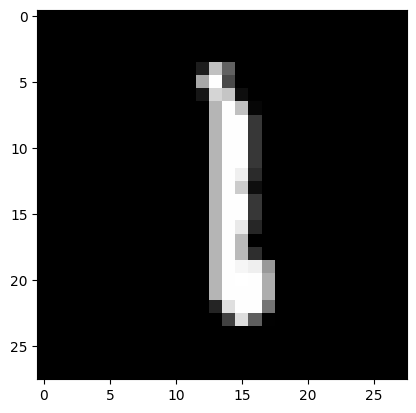

In [ ]:
i = np.random.randint(0,59999)
print(y_train[i])
plt.imshow(X_train[i], cmap = 'gray')

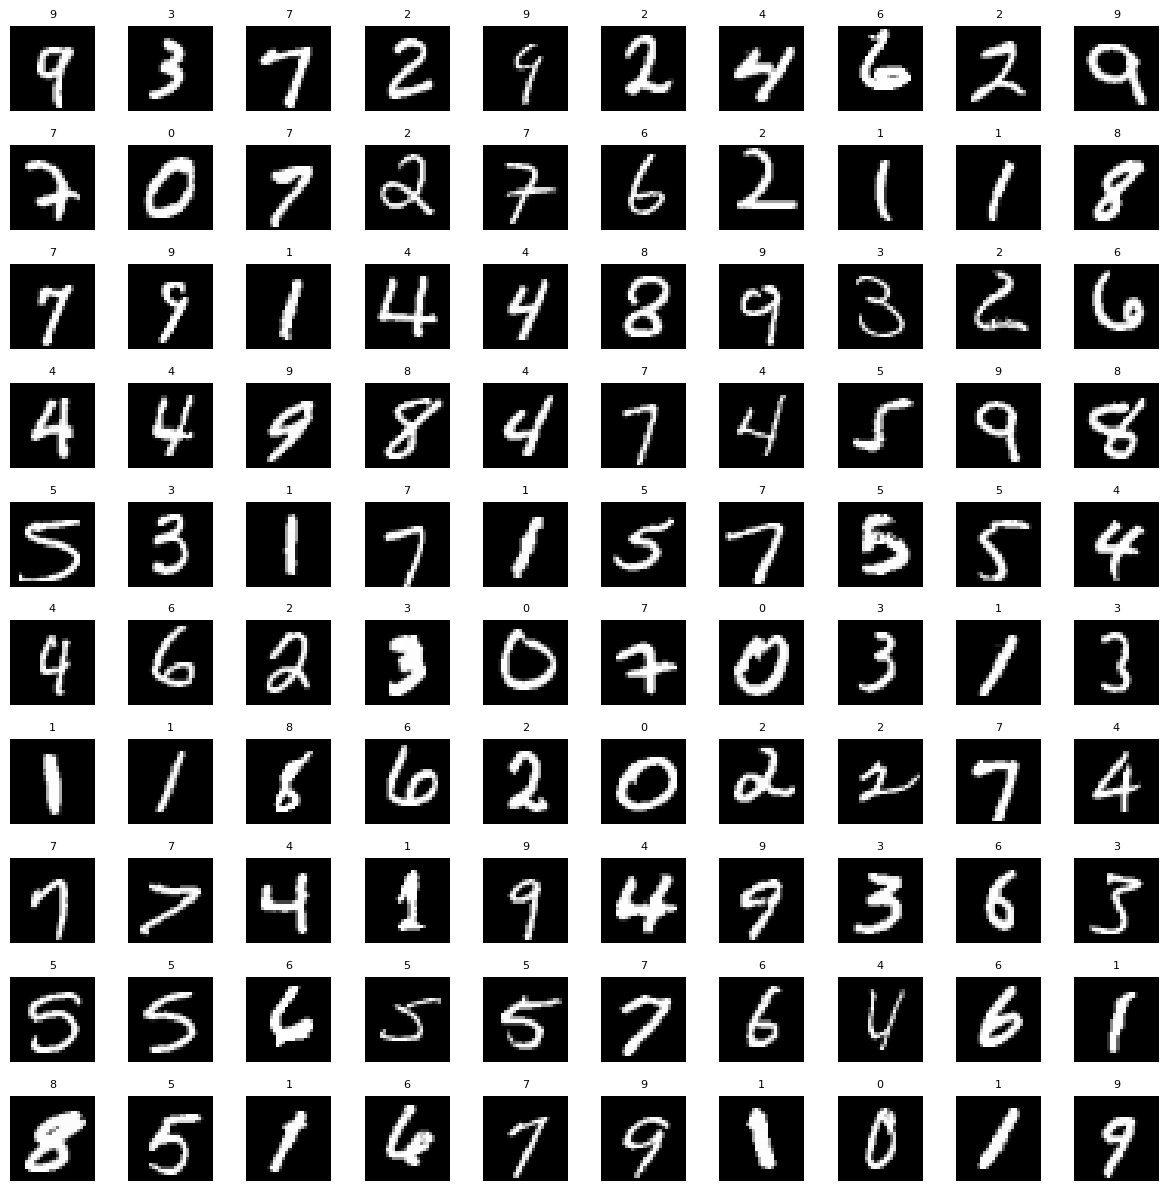

In [ ]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize = (15,15))

axes = axes.ravel() # (10,10) -> [100]
for i in np.arange(0, width * height) :
    index = np.random.randint(0,59999)
    axes[i].imshow(X_train[index], cmap = 'gray')
    axes[i].set_title(y_train[index], fontsize = 8) # 라벨 보여주기
    axes[i].axis('off') # 격자 없애기
plt.subplots_adjust(hspace = 0.4) # 이미지 사이의 수평 공백

### Pre-processing the images

In [ ]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [ ]:
# normalize
X_train = X_train /255
X_test = X_test / 255

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# for linear autoEncoder, vetorizing
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the linear autoencoder

784 - 128 - 64 - 32 - 64 - 128 - 784

이런 크기로 인코딩, 디코딩 할거야.

In [ ]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128 , activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 32, activation = 'relu'))

# Decode
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 128, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid')) # predict -> pixel value
# 만약 다시 사진으로 돌아가는 것이 아니라, 분류를 하는 거라면
# autoencoder.add(Dense(units = 10, activation = 'softmax'))


print(autoencoder.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [ ]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # sigmoid -> binary_crossentropy

In [ ]:
autoencoder.fit(X_train, X_train, epochs = 50) # 다시 자신으로 돌아가는 거야.

Epoch 1/50
1875/1875 [==============================] - 17s 8ms/step - loss: 0.1515 - accuracy: 0.0109
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1103 - accuracy: 0.0114
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1026 - accuracy: 0.0128
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0983 - accuracy: 0.0128
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0953 - accuracy: 0.0124
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0931 - accuracy: 0.0136
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0914 - accuracy: 0.0143
Epoch 8/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0902 - accuracy: 0.0132
Epoch 9/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0893 - accuracy: 0.0137
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - l

### Encoding the images

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [ ]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [ ]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [ ]:
# encoding만 보고 싶을 때.
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


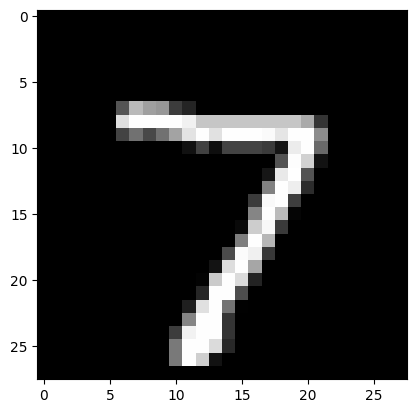

In [ ]:
# 압축할 image
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray')

In [ ]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 88ms/step


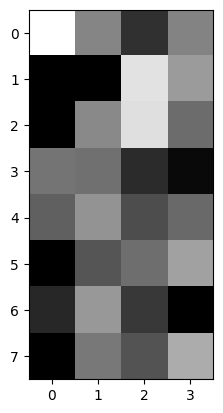

In [ ]:
plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')

### Decoding the images

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [ ]:
# 디코딩을 할 때 input layer는 다시 설정해 줘야해.
# Dense_3 의 경우 Input_layer가 아닌 그냥 전연결층이야.
input_layer_decoder = Input(shape = 32,)
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]

# 연결
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 58ms/step


In [ ]:
decoded_image.shape

(1, 784)

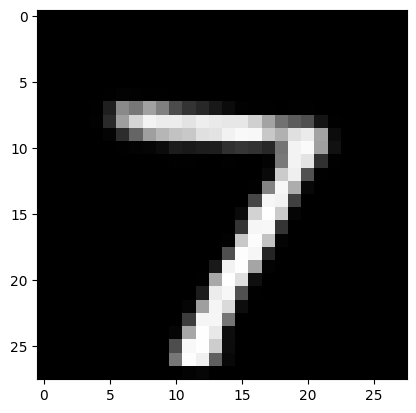

In [ ]:
plt.imshow(decoded_image.reshape(28,28), cmap = 'gray')

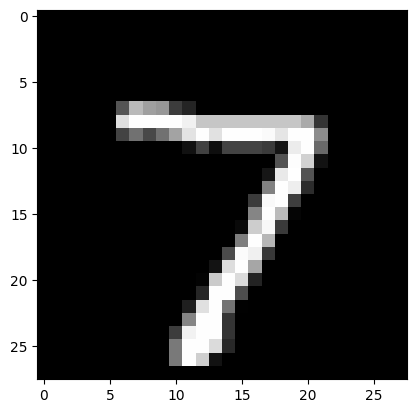

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray')

### Encoding and decoding the test images

1/1 [==============================] - 0s 24ms/step


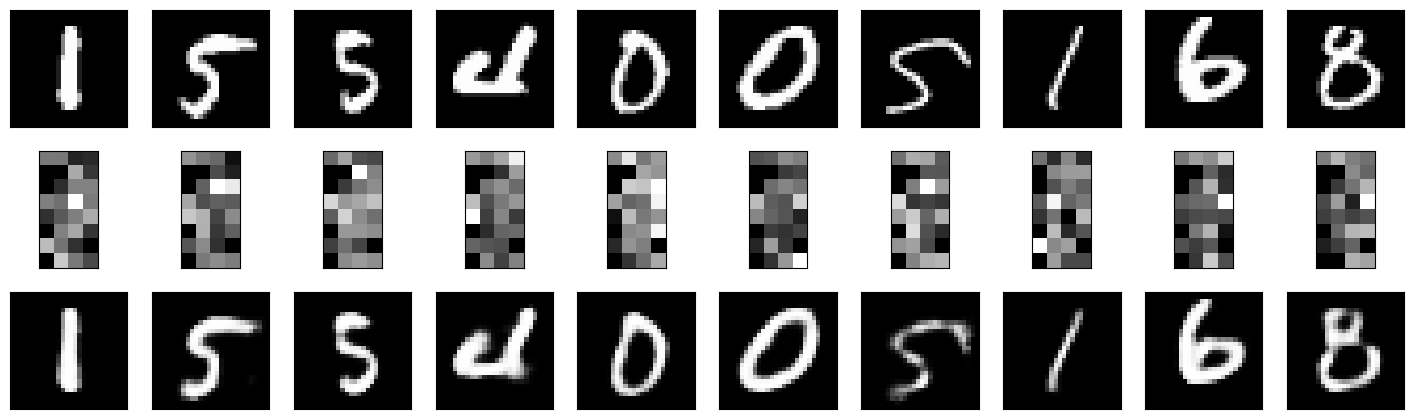

In [ ]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0]-1, size = n_images)
# print(test_images)

plt.figure(figsize = (18,18))

for i , image_index in enumerate(test_images):
    # print(i, image_index)

    ax = plt.subplot(10,10, i + 1)
    plt.imshow(X_test[image_index].reshape(28,28), cmap = 'gray')
    plt.xticks(())
    plt.yticks(())

    # Coded images
    ax = plt.subplot(10,10, i + 1 + n_images)
    encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
    plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
    plt.xticks(())
    plt.yticks(())

    ax = plt.subplot(10,10, i + 1 + 2 * n_images)
    decoded_image = decoder.predict(encoded_image)
    plt.imshow(decoded_image.reshape(28,28), cmap = 'gray')
    plt.xticks(())
    plt.yticks(())

## Convolutional autoencoders

### Importing the libraries

In [56]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

### Loading the dataset

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [57]:
from tensorflow.keras.datasets import fashion_mnist

In [58]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [59]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [60]:
# resize
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))


In [62]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Visualizing the images

### Pre-processing the images

### Building and training the convolutional autoencoder

In [71]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'valid' , input_shape = (28,28,1)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3) , activation = 'relu', padding = 'same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

# autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', padding = 'same' , strides = (2,2))) # strides가 커지면 이미지는 작아져.

autoencoder.add(Flatten())

# autoencoder.summary()

# decoder

autoencoder.add(Reshape((4,4,8)))

autoencoder.add(Conv2D(filters = 8 , kernel_size = (3,3), activation = 'relu', padding = 'same'))

# autoencoder.summary()

autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 8 , kernel_size = (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(UpSampling2D(size = (2,2)))
autoencoder.add(Conv2D(filters = 16 , kernel_size = (3,3), activation = 'relu'))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 1 , kernel_size = (3,3), activation = 'sigmoid', padding = 'same')) # 이미지를 normalize해서

autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_6 (Flatten)         (None, 128)              

In [ ]:
'''
위 숫자의 이해.

output = (input - filter + 1) / Stride

Input : (28,28,1)
Filter size : 3
output : (28 - 3 + 1) / 1 = 26 -> (26,26 , # of filters )


UpSampling2D : (16,16,8)
Filter size : 3
output : (16-3+1)/1 = 14 -> (14,14,16)
'''

In [72]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# train

### Encoding and decoding the test images

In [73]:
autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_6 (Flatten)         (None, 128)              

In [75]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_6').output)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30_input (InputLaye  [(None, 28, 28, 1)]       0         
 r)                                                              
                                                                 
 conv2d_30 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                           

In [76]:
coded_test_images = encoder.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [77]:
coded_test_images.shape

(10000, 128)